# 01 - Exploratory Data Analysis (EDA)
## Credit Scoring Model Project

**Learning Objectives:**
- Understand the dataset structure and characteristics
- Identify data quality issues (missing values, outliers, anomalies)
- Analyze target variable distribution and class imbalance
- Explore relationships between features and target
- Generate insights to guide feature engineering and modeling

**What is EDA?**
Exploratory Data Analysis is the critical first step in any data science project. It helps you:
1. **Understand** what data you have
2. **Identify** problems (missing data, outliers, inconsistencies)
3. **Discover** patterns and relationships
4. **Generate** hypotheses for modeling
5. **Make** informed decisions about preprocessing and feature engineering

Let's begin!

## 📦 Import Libraries

We'll use:
- **pandas**: Data manipulation and analysis
- **numpy**: Numerical computing
- **matplotlib & seaborn**: Data visualization
- **missingno**: Specialized missing data visualization
- **warnings**: Suppress unnecessary warnings

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Utilities
import warnings
import os
from pathlib import Path

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

✅ Libraries imported successfully!
📊 Pandas version: 2.3.3
🔢 NumPy version: 2.3.5


## 📂 Load Data

We'll load the main application training data. This contains information about loan applications and the target variable (whether the client had payment difficulties).

**Understanding the Dataset:**
- **Source:** Home Credit Default Risk (Kaggle)
- **Type:** Binary classification (predict loan default)
- **Training samples:** 307,511 applications
- **Features:** 122 columns (mix of numerical and categorical)
- **Target:** `TARGET` (1 = payment difficulties, 0 = no difficulties)

In [ ]:
# Add parent directory to path for imports
import sys
sys.path.append('..')

# Import data loading function
from src.data_preprocessing import load_data

print("Loading comprehensive data from all sources...")
print("This includes:")
print("  - Application data (train/test)")
print("  - Bureau credit history")
print("  - Previous applications")
print("  - Credit card balances")
print("  - POS/cash balances")
print("  - Installment payments")
print("\nThis may take 2-3 minutes...\n")

# Load data with all sources
train_df, test_df = load_data(data_path='../data', use_all_data_sources=True)

print(f"\n{'='*80}")
print("DATA LOADING COMPLETE")
print(f"{'='*80}")
print(f"\n📊 Training set shape: {train_df.shape}")
print(f"   - Rows (applications): {train_df.shape[0]:,}")
print(f"   - Columns (features): {train_df.shape[1]}")
print(f"   - Original features: 122")
print(f"   - New aggregated features: {train_df.shape[1] - 122}")
print(f"\n📊 Test set shape: {test_df.shape}")
print(f"   - Rows (applications): {test_df.shape[0]:,}")
print(f"   - Columns (features): {test_df.shape[1]}")

# Memory usage
memory_mb = train_df.memory_usage(deep=True).sum() / 1024**2
print(f"\n💾 Memory usage: {memory_mb:.2f} MB")

# Show feature prefixes
print(f"\n📋 Feature categories:")
bureau_features = [col for col in train_df.columns if col.startswith('BUREAU_')]
prev_features = [col for col in train_df.columns if col.startswith('PREV_')]
cc_features = [col for col in train_df.columns if col.startswith('CC_')]
pos_features = [col for col in train_df.columns if col.startswith('POS_')]
inst_features = [col for col in train_df.columns if col.startswith('INST_')]

print(f"   - BUREAU features (credit history): {len(bureau_features)}")
print(f"   - PREV features (previous applications): {len(prev_features)}")
print(f"   - CC features (credit cards): {len(cc_features)}")
print(f"   - POS features (POS/cash loans): {len(pos_features)}")
print(f"   - INST features (installments): {len(inst_features)}")
print(f"   - Original application features: {train_df.shape[1] - len(bureau_features) - len(prev_features) - len(cc_features) - len(pos_features) - len(inst_features)}")

## 👀 First Look at the Data

Let's examine the first few rows to understand what information we have.

In [3]:
# Display first few rows
print("First 5 rows of training data:")
train_df.head()

First 5 rows of training data:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

## 📋 Data Structure and Types

Understanding data types is crucial:
- **int64/float64:** Numerical features (can use directly in models)
- **object:** Usually categorical text (need encoding)
- **bool:** Binary flags

Let's analyze the data types and basic statistics.

In [4]:
# Dataset info
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
train_df.info()

print("\n" + "=" * 80)
print("DATA TYPE SUMMARY")
print("=" * 80)
type_counts = train_df.dtypes.value_counts()
print(type_counts)

print("\n" + "=" * 80)
print("BREAKDOWN BY TYPE")
print("=" * 80)
print(f"Numerical features (int64/float64): {len(train_df.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"Categorical features (object): {len(train_df.select_dtypes(include=['object']).columns)}")

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

DATA TYPE SUMMARY
float64    65
int64      41
object     16
Name: count, dtype: int64

BREAKDOWN BY TYPE
Numerical features (int64/float64): 106


Categorical features (object): 16


## 🎯 Target Variable Analysis

**CRITICAL:** Understanding the target distribution is essential!

The target variable (`TARGET`) indicates:
- **0:** Client repaid loan without difficulties (NEGATIVE class)
- **1:** Client had payment difficulties (POSITIVE class - what we want to predict)

**Class Imbalance:**
In credit scoring, most people repay their loans, so we expect:
- Many more 0s than 1s (imbalanced dataset)
- This affects model training and evaluation strategy!

In [5]:
# Target distribution
print("=" * 80)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 80)

target_counts = train_df['TARGET'].value_counts()
target_pct = train_df['TARGET'].value_counts(normalize=True) * 100

print("\nAbsolute counts:")
print(target_counts)
print("\nPercentages:")
print(target_pct)

# Calculate imbalance ratio
imbalance_ratio = target_counts[0] / target_counts[1]
print(f"\n⚠️  IMBALANCE RATIO: {imbalance_ratio:.2f}:1")
print(f"   For every 1 defaulter, there are ~{imbalance_ratio:.0f} non-defaulters")
print(f"\n💡 This means:")
print(f"   - We CANNOT use accuracy as our primary metric")
print(f"   - We MUST use stratified sampling")
print(f"   - We should consider class weighting or resampling techniques")

TARGET VARIABLE DISTRIBUTION

Absolute counts:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Percentages:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

⚠️  IMBALANCE RATIO: 11.39:1
   For every 1 defaulter, there are ~11 non-defaulters

💡 This means:
   - We CANNOT use accuracy as our primary metric
   - We MUST use stratified sampling
   - We should consider class weighting or resampling techniques


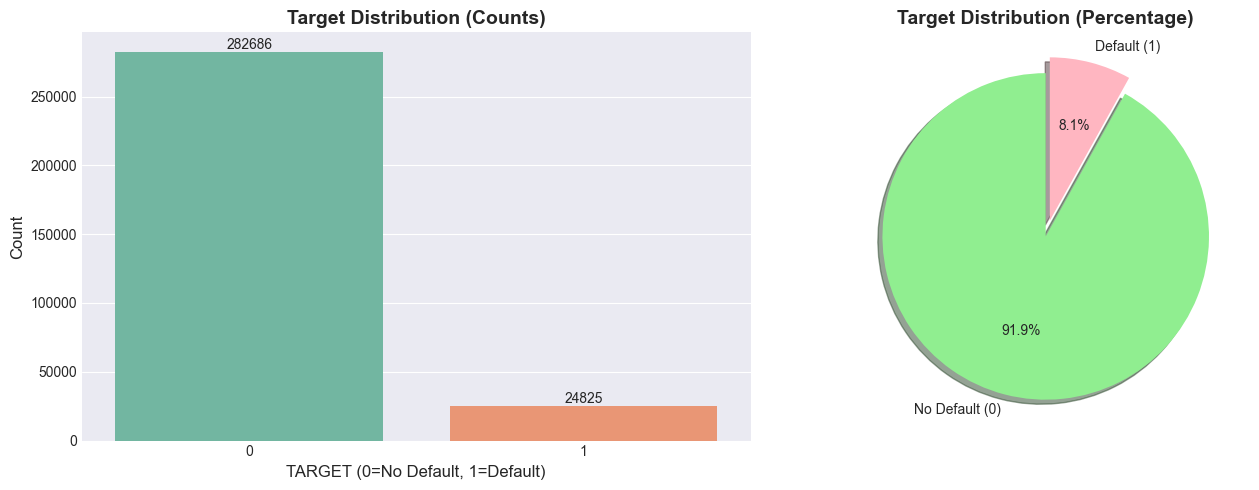


✅ Visualization complete!


In [6]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=train_df, x='TARGET', ax=axes[0], palette='Set2')
axes[0].set_title('Target Distribution (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('TARGET (0=No Default, 1=Default)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

# Pie chart
colors = ['#90EE90', '#FFB6C1']  # Green for 0, Red for 1
explode = (0, 0.1)  # Explode the defaulters slice
axes[1].pie(target_counts, labels=['No Default (0)', 'Default (1)'], autopct='%1.1f%%',
            startangle=90, colors=colors, explode=explode, shadow=True)
axes[1].set_title('Target Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualization complete!")

## 🔍 Missing Values Analysis

**Why missing values matter:**
- Most ML algorithms can't handle missing values directly
- Missing patterns might be informative (e.g., "no previous credit" could be significant)
- We need to decide: impute, drop, or create "missing" indicator features

Let's identify which features have missing data and how much.

In [7]:
def analyze_missing_values(df, name="Dataset"):
    """
    Comprehensive missing value analysis.

    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to analyze
    name : str
        Name of the dataset for display

    Returns:
    --------
    pandas.DataFrame : Missing value summary
    """
    # Calculate missing values
    missing = df.isnull().sum()
    missing_pct = 100 * missing / len(df)

    # Create summary table
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': missing.values,
        'Missing_Percent': missing_pct.values,
        'Data_Type': df.dtypes.values
    })

    # Filter to only columns with missing values
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
        'Missing_Percent', ascending=False
    ).reset_index(drop=True)

    # Print summary
    print("=" * 80)
    print(f"MISSING VALUES ANALYSIS - {name}")
    print("=" * 80)
    print(f"Total columns: {df.shape[1]}")
    print(f"Columns with missing values: {len(missing_df)}")
    print(f"Columns complete (no missing): {df.shape[1] - len(missing_df)}")

    if len(missing_df) > 0:
        print(f"\nMost affected columns (top 10):")
        print(missing_df.head(10).to_string(index=False))

    return missing_df

# Analyze training data
missing_train = analyze_missing_values(train_df, "Training Set")

MISSING VALUES ANALYSIS - Training Set
Total columns: 122
Columns with missing values: 67
Columns complete (no missing): 55

Most affected columns (top 10):
                  Column  Missing_Count  Missing_Percent Data_Type
         COMMONAREA_MEDI         214865        69.872297   float64
         COMMONAREA_MODE         214865        69.872297   float64
          COMMONAREA_AVG         214865        69.872297   float64
NONLIVINGAPARTMENTS_MODE         213514        69.432963   float64
NONLIVINGAPARTMENTS_MEDI         213514        69.432963   float64
 NONLIVINGAPARTMENTS_AVG         213514        69.432963   float64
      FONDKAPREMONT_MODE         210295        68.386172    object
    LIVINGAPARTMENTS_AVG         210199        68.354953   float64
   LIVINGAPARTMENTS_MEDI         210199        68.354953   float64
   LIVINGAPARTMENTS_MODE         210199        68.354953   float64


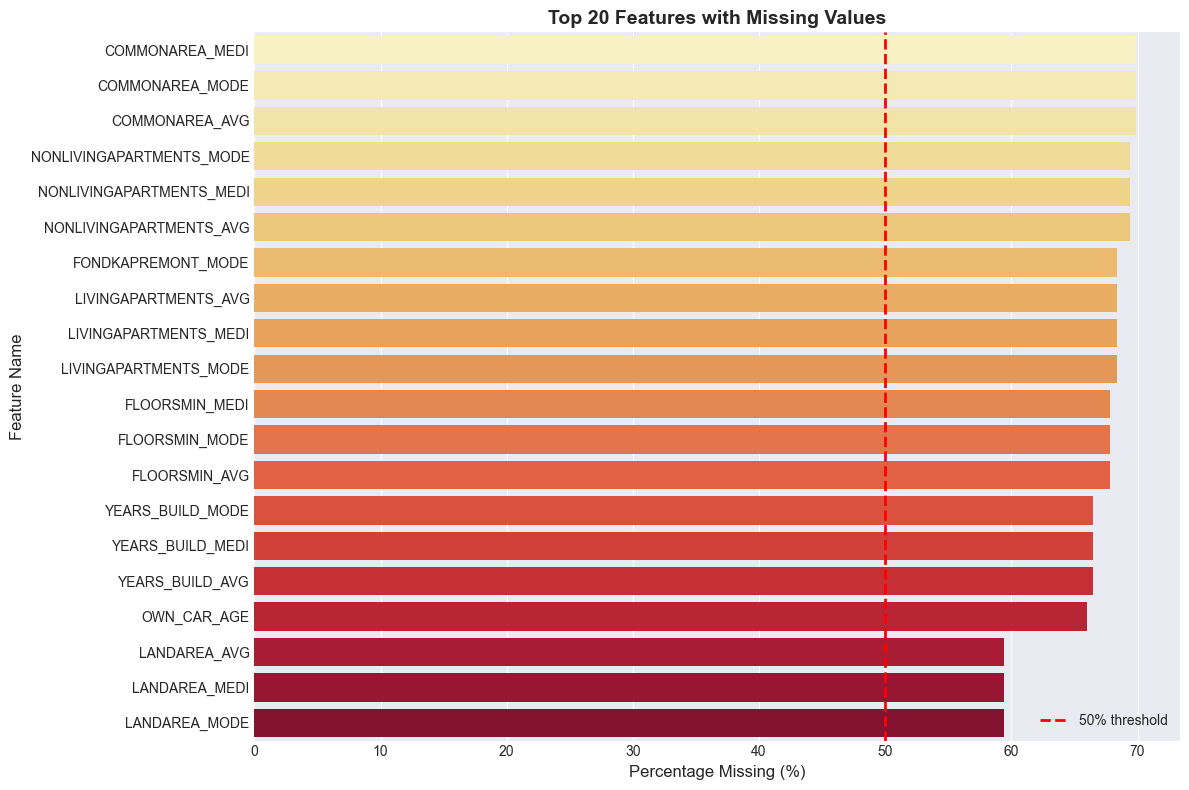


Missing Value Matrix (sample of 1000 rows):


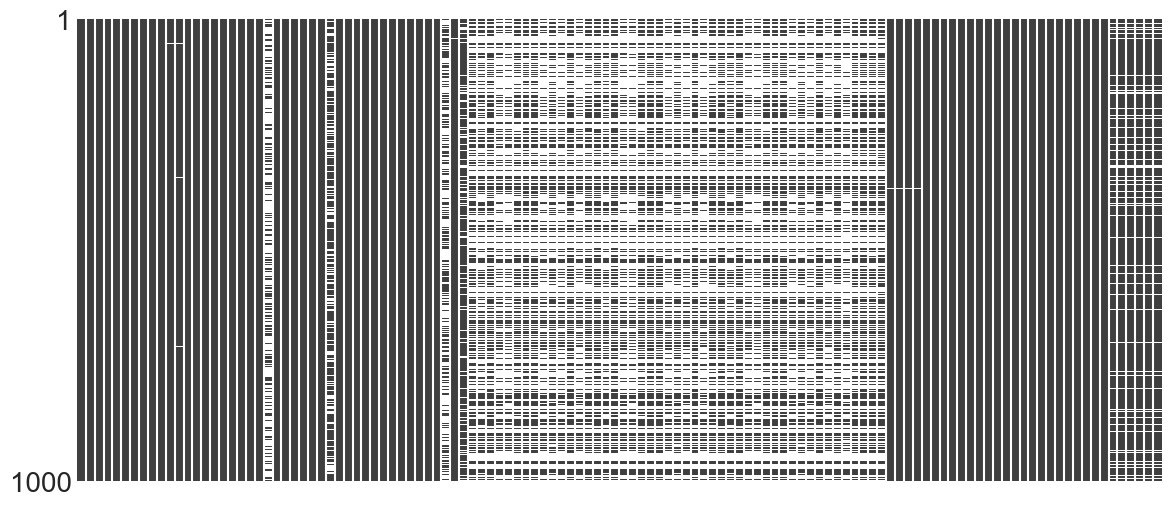

In [8]:
# Visualize missing values

if len(missing_train) > 0:
    # Bar plot of top 20 features with missing values
    fig, ax = plt.subplots(figsize=(12, 8))

    top_missing = missing_train.head(20)
    sns.barplot(data=top_missing, y='Column', x='Missing_Percent', palette='YlOrRd', ax=ax)
    ax.set_title('Top 20 Features with Missing Values', fontsize=14, fontweight='bold')
    ax.set_xlabel('Percentage Missing (%)', fontsize=12)
    ax.set_ylabel('Feature Name', fontsize=12)
    ax.axvline(x=50, color='red', linestyle='--', label='50% threshold', linewidth=2)
    ax.legend()

    plt.tight_layout()
    plt.show()

    # Matrix visualization (sample for performance)
    print("\nMissing Value Matrix (sample of 1000 rows):")
    sample_size = min(1000, len(train_df))
    msno.matrix(train_df.sample(sample_size, random_state=RANDOM_STATE), figsize=(14, 6), sparkline=False)
    plt.show()

else:
    print("\n✅ No missing values found!")

### 💡 Missing Value Insights

**Key Observations:**
1. Some features have >60% missing values (e.g., building/apartment characteristics)
   - These might be missing for a reason (e.g., applicant doesn't own property)
   - Consider dropping or creating "is_missing" indicator features

2. Features with <10% missing can often be imputed safely
   - Use median/mode for numerical features
   - Use most frequent for categorical features

3. Missing values might be informative!
   - Example: Missing "OWN_CAR_AGE" might mean no car ownership
   - Don't just drop or impute blindly - think about WHY data is missing

**Next Steps:**
- In the Feature Engineering notebook, we'll handle these systematically
- We'll create missing indicators for important features
- We'll use domain knowledge to guide imputation strategies

## 📊 Numerical Features Analysis

Let's examine the numerical features:
- Distribution shapes (normal, skewed?)
- Outliers
- Ranges and scales
- Correlations with target

In [9]:
# Select numerical features (exclude ID and TARGET)
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('SK_ID_CURR')  # Remove ID
numerical_features.remove('TARGET')  # Remove target

print(f"Found {len(numerical_features)} numerical features")
print(f"\nFirst 10 numerical features:")
print(numerical_features[:10])

# Summary statistics
print("\n" + "=" * 80)
print("SUMMARY STATISTICS (key features)")
print("=" * 80)
key_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
print(train_df[key_features].describe())

Found 104 numerical features

First 10 numerical features:
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

SUMMARY STATISTICS (key features)
       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05   
mean       1.687979e+05  5.990260e+05   27108.573909     5.383962e+05   
std        2.371231e+05  4.024908e+05   14493.737315     3.694465e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

          DAYS_BIRTH  DAYS_EMPLOYED   CNT_CHILDREN  CNT_FAM_ME

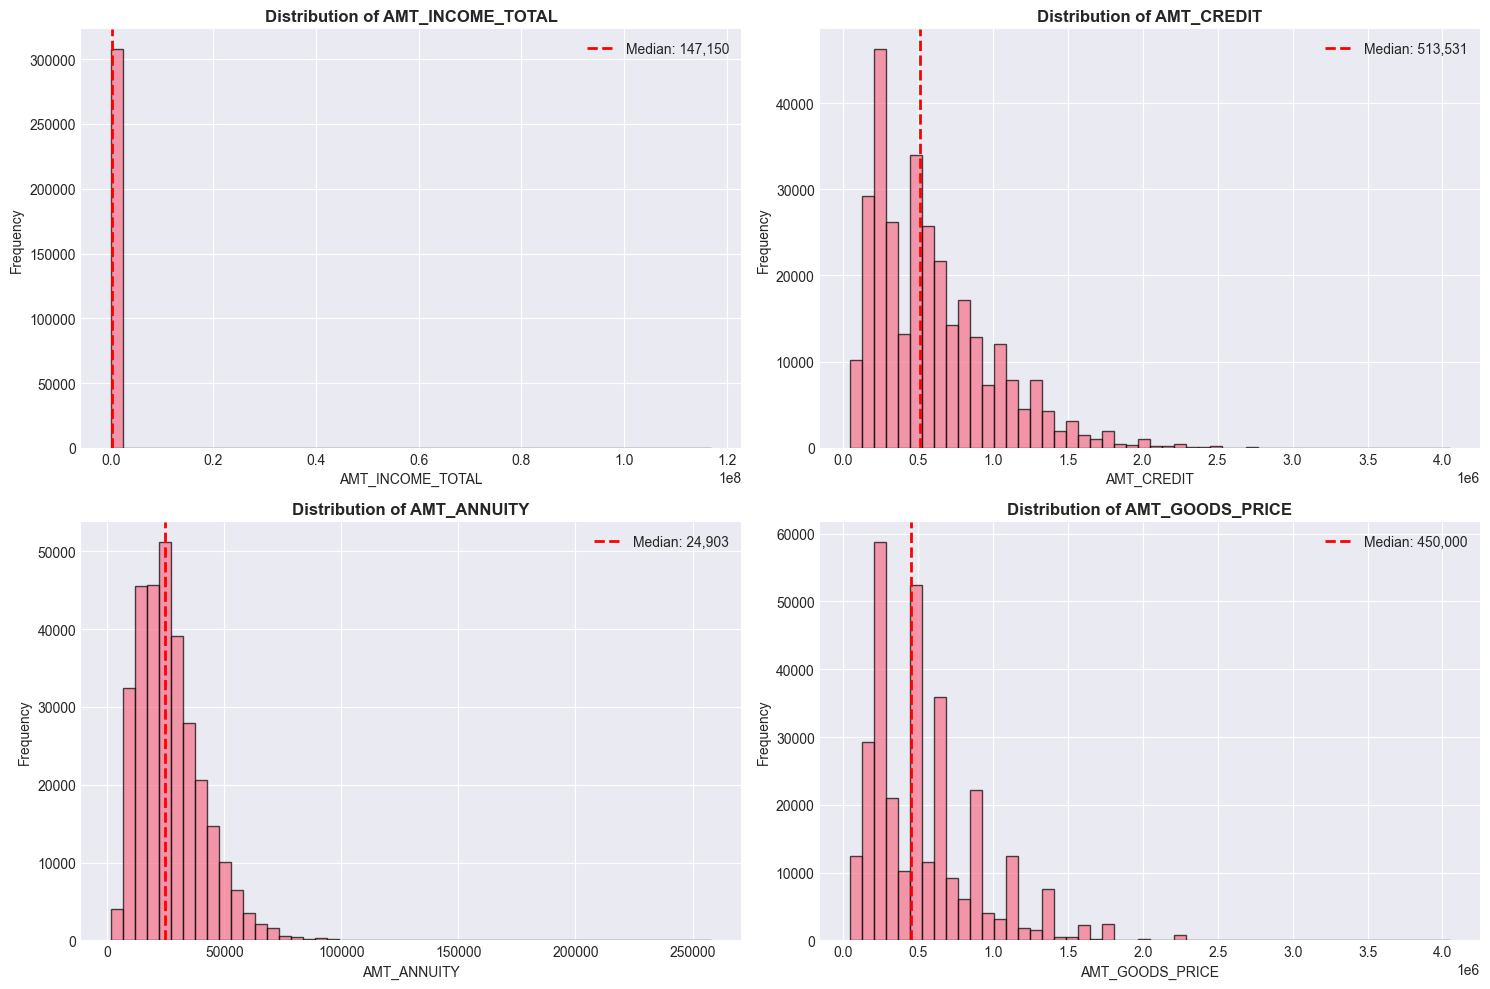


💡 Notice:
   - Most amount features are right-skewed (long tail to the right)
   - This is typical for financial data (few very high values)
   - May need log transformation for some models


In [10]:
# Visualize key numerical features
key_features_to_plot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features_to_plot):
    # Plot distribution
    train_df[feature].hist(bins=50, ax=axes[idx], edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].axvline(train_df[feature].median(), color='red', linestyle='--',
                      label=f'Median: {train_df[feature].median():,.0f}', linewidth=2)
    axes[idx].legend()

plt.tight_layout()
plt.show()

print("\n💡 Notice:")
print("   - Most amount features are right-skewed (long tail to the right)")
print("   - This is typical for financial data (few very high values)")
print("   - May need log transformation for some models")

### Age Analysis

**Important Note:** `DAYS_BIRTH` is stored as negative days from current date.
- More negative = older person
- We'll convert to actual age in years for easier interpretation

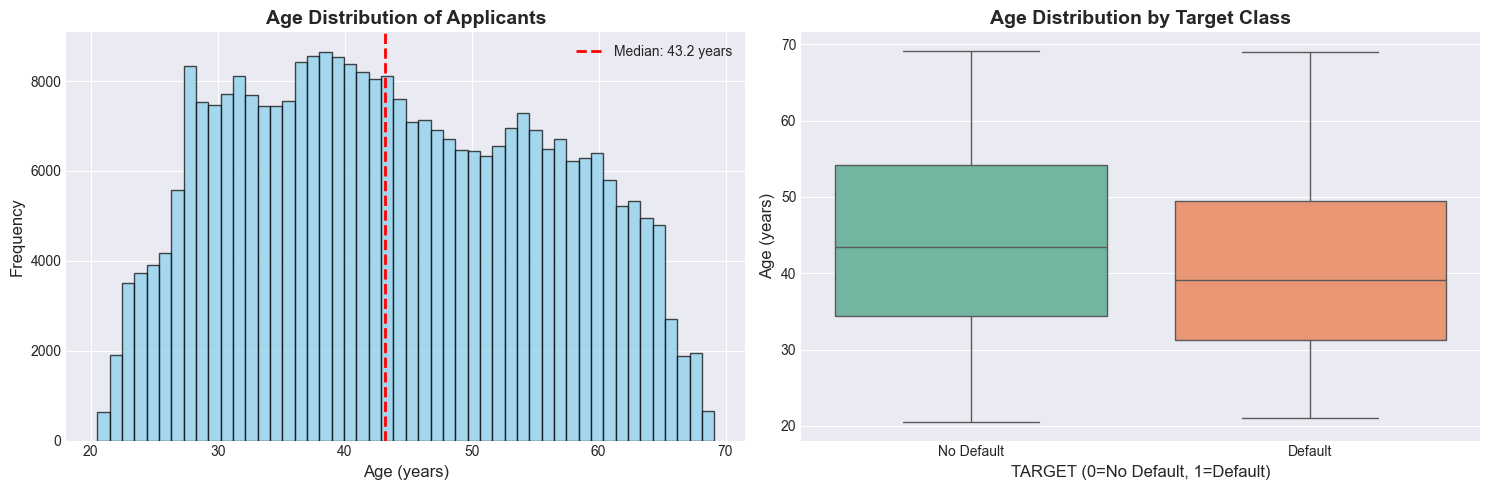


Age Statistics by Target:
           count       mean        std        min        25%        50%  \
TARGET                                                                    
0       282686.0  44.214182  11.956715  20.517808  34.345205  43.498630   
1        24825.0  40.780351  11.487245  21.035616  31.221918  39.128767   

              75%        max  
TARGET                        
0       54.229452  69.120548  
1       49.416438  68.953425  

💡 Insight:
   Are there age differences between defaulters and non-defaulters?
   This could be a useful predictive feature!


In [11]:
# Convert DAYS_BIRTH to years
train_df['AGE_YEARS'] = -train_df['DAYS_BIRTH'] / 365

# Plot age distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Age distribution
axes[0].hist(train_df['AGE_YEARS'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Age Distribution of Applicants', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age (years)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(train_df['AGE_YEARS'].median(), color='red', linestyle='--',
                label=f'Median: {train_df['AGE_YEARS'].median():.1f} years', linewidth=2)
axes[0].legend()

# Age vs Target
sns.boxplot(data=train_df, x='TARGET', y='AGE_YEARS', palette='Set2', ax=axes[1])
axes[1].set_title('Age Distribution by Target Class', fontsize=14, fontweight='bold')
axes[1].set_xlabel('TARGET (0=No Default, 1=Default)', fontsize=12)
axes[1].set_ylabel('Age (years)', fontsize=12)
axes[1].set_xticklabels(['No Default', 'Default'])

plt.tight_layout()
plt.show()

print("\nAge Statistics by Target:")
print(train_df.groupby('TARGET')['AGE_YEARS'].describe())

print("\n💡 Insight:")
print("   Are there age differences between defaulters and non-defaulters?")
print("   This could be a useful predictive feature!")

## 📝 Categorical Features Analysis

Categorical features represent discrete categories or groups:
- Contract type (Cash loans vs Revolving loans)
- Gender
- Income type
- Education level
- etc.

We need to understand:
- How many unique values each has
- Distribution across categories
- Relationship with target variable

In [12]:
# Identify categorical features
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

print(f"Found {len(categorical_features)} categorical features")
print(f"\nCategorical features:")
print(categorical_features)

# Analyze unique values
print("\n" + "=" * 80)
print("UNIQUE VALUES IN CATEGORICAL FEATURES")
print("=" * 80)

cat_unique = pd.DataFrame({
    'Feature': categorical_features,
    'Unique_Values': [train_df[col].nunique() for col in categorical_features],
    'Most_Common': [train_df[col].mode()[0] if len(train_df[col].mode()) > 0 else None
                    for col in categorical_features],
    'Most_Common_Freq': [train_df[col].value_counts().iloc[0] if len(train_df[col]) > 0 else 0
                         for col in categorical_features]
})

print(cat_unique.sort_values('Unique_Values', ascending=False))

Found 16 categorical features

Categorical features:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

UNIQUE VALUES IN CATEGORICAL FEATURES


                       Feature  Unique_Values                    Most_Common  \
11           ORGANIZATION_TYPE             58         Business Entity Type 3   
9              OCCUPATION_TYPE             18                       Laborers   
5             NAME_INCOME_TYPE              8                        Working   
4              NAME_TYPE_SUITE              7                  Unaccompanied   
14          WALLSMATERIAL_MODE              7                          Panel   
10  WEEKDAY_APPR_PROCESS_START              7                        TUESDAY   
7           NAME_FAMILY_STATUS              6                        Married   
8            NAME_HOUSING_TYPE              6              House / apartment   
6          NAME_EDUCATION_TYPE              5  Secondary / secondary special   
12          FONDKAPREMONT_MODE              4               reg oper account   
13              HOUSETYPE_MODE              3                 block of flats   
1                  CODE_GENDER          

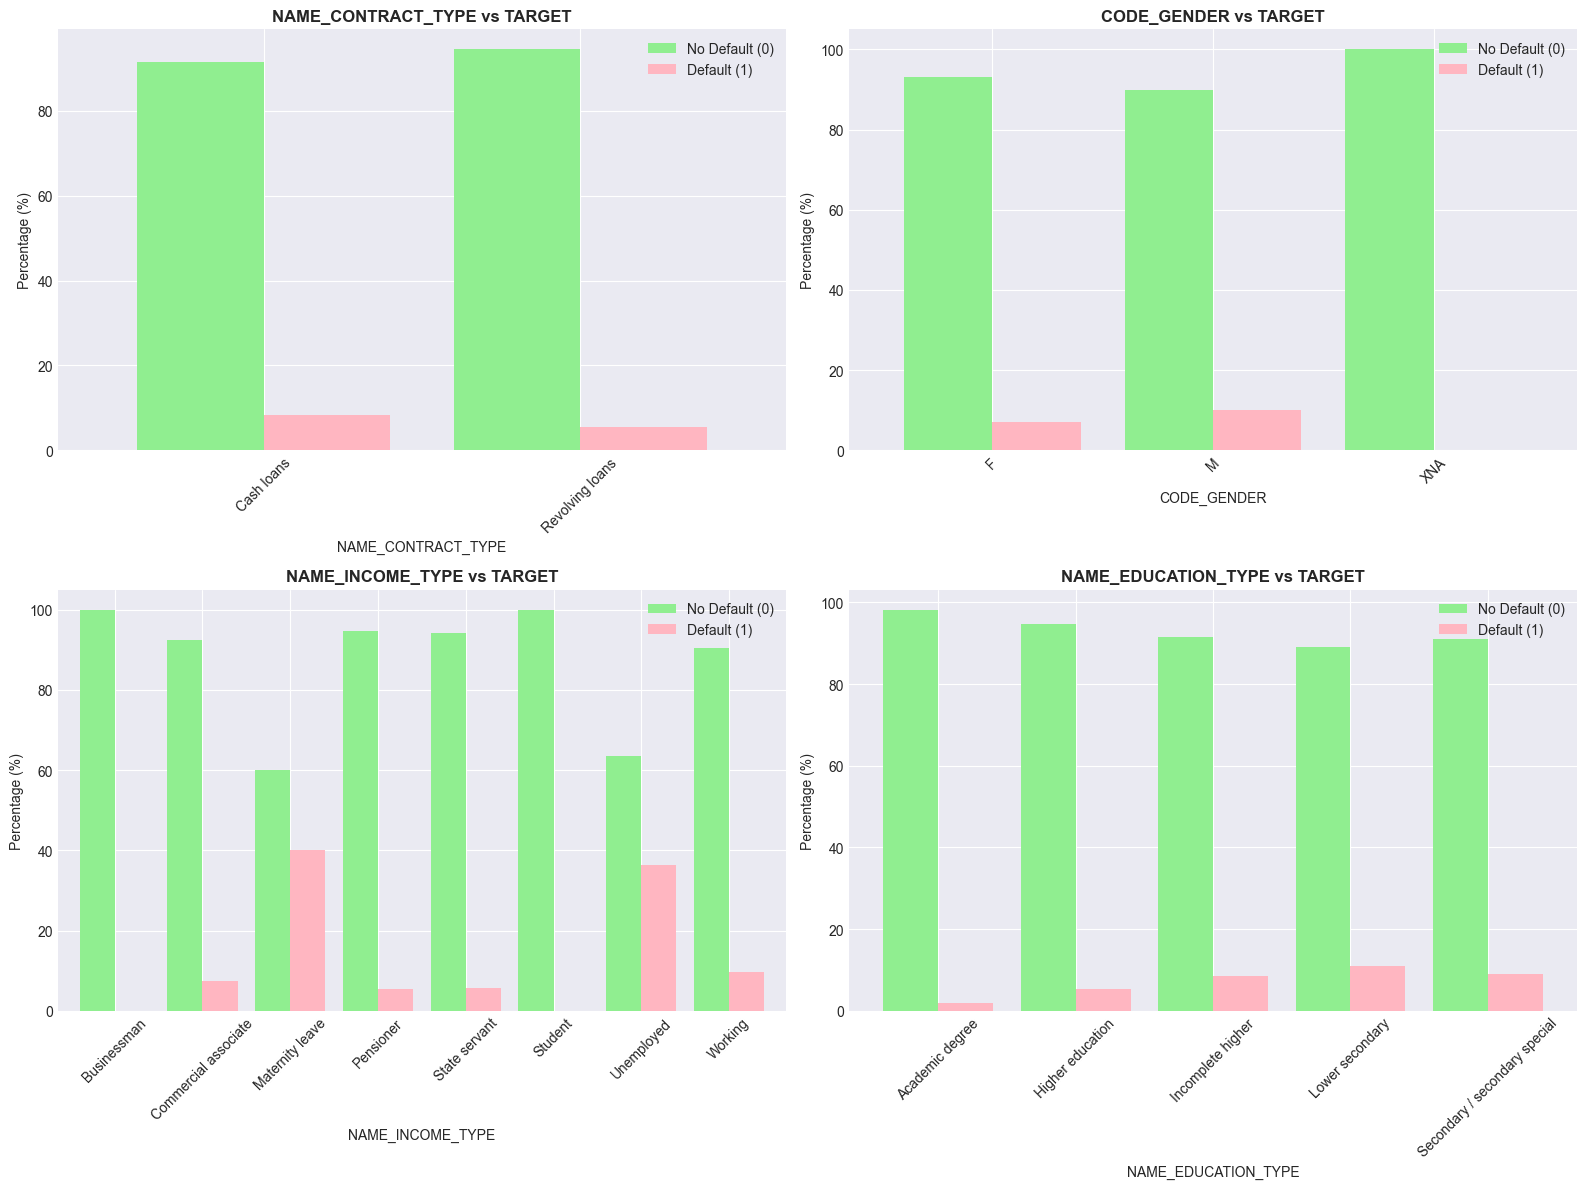


💡 Look for:
   - Which categories have higher default rates?
   - Are there patterns? (e.g., certain income types or education levels)
   - These insights guide feature engineering and model interpretation!


In [13]:
# Visualize key categorical features
key_cat_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(key_cat_features):
    # Count by category and target
    ct = pd.crosstab(train_df[feature], train_df['TARGET'], normalize='index') * 100

    ct.plot(kind='bar', ax=axes[idx], color=['#90EE90', '#FFB6C1'], width=0.8)
    axes[idx].set_title(f'{feature} vs TARGET', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Percentage (%)', fontsize=10)
    axes[idx].legend(['No Default (0)', 'Default (1)'], loc='upper right')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n💡 Look for:")
print("   - Which categories have higher default rates?")
print("   - Are there patterns? (e.g., certain income types or education levels)")
print("   - These insights guide feature engineering and model interpretation!")

## 🔗 Correlation Analysis

**What is correlation?**
Correlation measures the linear relationship between two numerical variables:
- **+1:** Perfect positive correlation (both increase together)
- **0:** No linear relationship
- **-1:** Perfect negative correlation (one increases, other decreases)

**Why it matters:**
1. **Feature selection:** Highly correlated features might be redundant
2. **Target relationships:** Features correlated with target are potentially useful
3. **Multicollinearity:** High correlation between features can cause issues in some models

**Important:** Correlation only captures LINEAR relationships! Non-linear patterns won't show up.

In [14]:
# Calculate correlation with target for numerical features
correlations = train_df[numerical_features + ['TARGET']].corr()['TARGET'].sort_values(ascending=False)

# Remove target itself
correlations = correlations.drop('TARGET')

print("=" * 80)
print("CORRELATION WITH TARGET")
print("=" * 80)
print("\nTop 10 Positive Correlations (increase with target):")
print(correlations.head(10))
print("\nTop 10 Negative Correlations (decrease with target):")
print(correlations.tail(10))

CORRELATION WITH TARGET

Top 10 Positive Correlations (increase with target):
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64

Top 10 Negative Correlations (decrease with target):
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


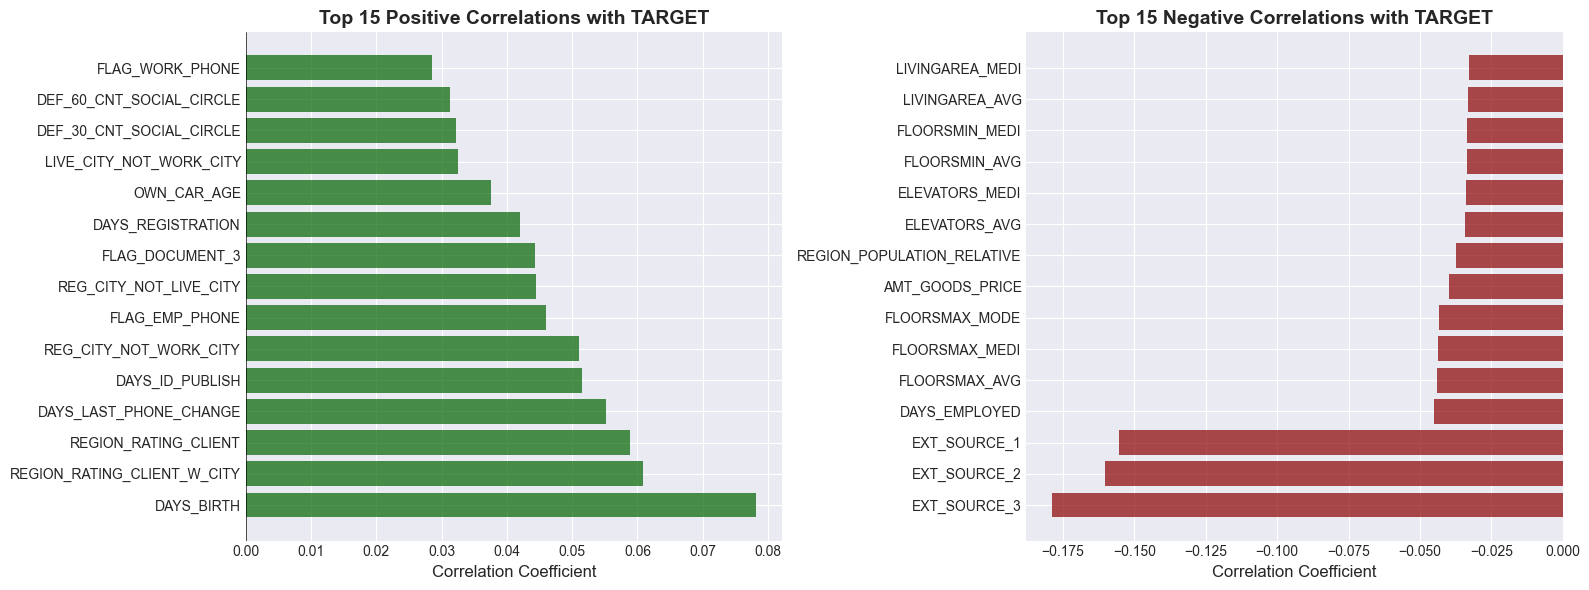


💡 Observations:
   - Features with abs(correlation) > 0.1 might be useful predictors
   - But weak correlation doesn't mean useless! Non-linear patterns exist
   - Tree-based models can capture non-linear relationships


In [15]:
# Visualize correlations with target
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top positive correlations
top_pos = correlations.head(15)
axes[0].barh(range(len(top_pos)), top_pos.values, color='darkgreen', alpha=0.7)
axes[0].set_yticks(range(len(top_pos)))
axes[0].set_yticklabels(top_pos.index)
axes[0].set_xlabel('Correlation Coefficient', fontsize=12)
axes[0].set_title('Top 15 Positive Correlations with TARGET', fontsize=14, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Top negative correlations
top_neg = correlations.tail(15).sort_values()
axes[1].barh(range(len(top_neg)), top_neg.values, color='darkred', alpha=0.7)
axes[1].set_yticks(range(len(top_neg)))
axes[1].set_yticklabels(top_neg.index)
axes[1].set_xlabel('Correlation Coefficient', fontsize=12)
axes[1].set_title('Top 15 Negative Correlations with TARGET', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("   - Features with abs(correlation) > 0.1 might be useful predictors")
print("   - But weak correlation doesn't mean useless! Non-linear patterns exist")
print("   - Tree-based models can capture non-linear relationships")

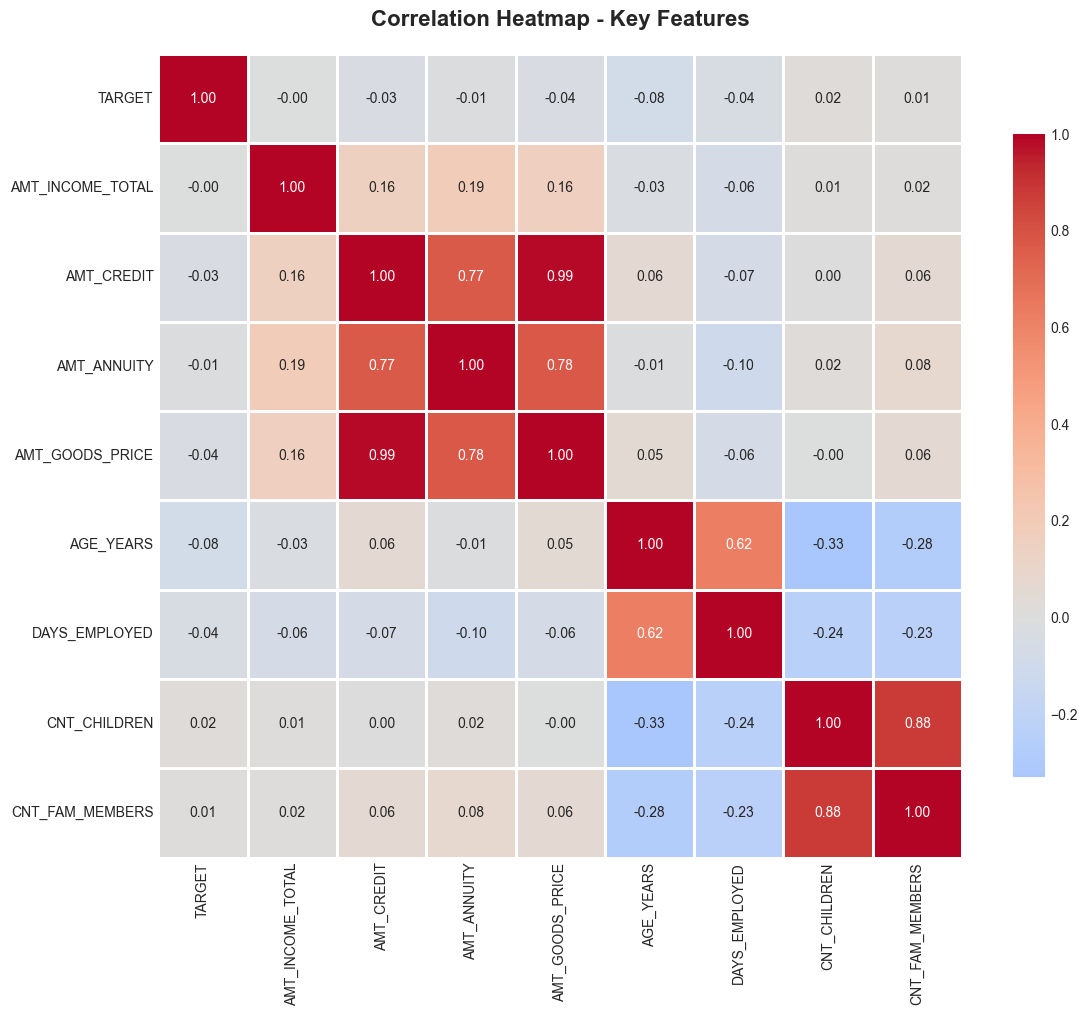


💡 Use this heatmap to:
   - Identify highly correlated feature pairs (consider removing one)
   - Find features most correlated with TARGET
   - Understand feature relationships for domain insights


In [16]:
# Correlation heatmap for key features
key_features_for_corr = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                          'AMT_GOODS_PRICE', 'AGE_YEARS', 'DAYS_EMPLOYED',
                          'CNT_CHILDREN', 'CNT_FAM_MEMBERS']

# Add TARGET column correlation
corr_matrix = train_df[key_features_for_corr].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Key Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Use this heatmap to:")
print("   - Identify highly correlated feature pairs (consider removing one)")
print("   - Find features most correlated with TARGET")
print("   - Understand feature relationships for domain insights")

## 📊 Exploring Aggregated Features from All Data Sources

Now let's explore the new features created from all the additional data sources:
- **Bureau features**: Credit history from other financial institutions
- **Previous application features**: Patterns from past loan applications
- **Credit card features**: Credit card usage and payment behavior
- **POS features**: Point-of-sale and cash loan patterns
- **Installment features**: Payment history and regularity

In [ ]:
# Analyze new aggregated features by source
print("="*80)
print("AGGREGATED FEATURES ANALYSIS")
print("="*80)

# Bureau features
bureau_features = [col for col in train_df.columns if col.startswith('BUREAU_')]
print(f"\n📊 BUREAU FEATURES (Credit History): {len(bureau_features)}")
print("Sample features:")
for feat in bureau_features[:5]:
    print(f"  - {feat}")
    
# Previous application features
prev_features = [col for col in train_df.columns if col.startswith('PREV_')]
print(f"\n📊 PREVIOUS APPLICATION FEATURES: {len(prev_features)}")
print("Sample features:")
for feat in prev_features[:5]:
    print(f"  - {feat}")
    
# Credit card features
cc_features = [col for col in train_df.columns if col.startswith('CC_')]
print(f"\n📊 CREDIT CARD FEATURES: {len(cc_features)}")
print("Sample features:")
for feat in cc_features[:5]:
    print(f"  - {feat}")
    
# POS features
pos_features = [col for col in train_df.columns if col.startswith('POS_')]
print(f"\n📊 POS/CASH FEATURES: {len(pos_features)}")
print("Sample features:")
for feat in pos_features[:5]:
    print(f"  - {feat}")
    
# Installment features
inst_features = [col for col in train_df.columns if col.startswith('INST_')]
print(f"\n📊 INSTALLMENT FEATURES: {len(inst_features)}")
print("Sample features:")
for feat in inst_features[:5]:
    print(f"  - {feat}")

# Count missing values in new features
all_new_features = bureau_features + prev_features + cc_features + pos_features + inst_features
missing_in_new = train_df[all_new_features].isnull().sum()
missing_pct = 100 * missing_in_new / len(train_df)

print(f"\n📈 Missing Values in Aggregated Features:")
print(f"   - Features with >50% missing: {(missing_pct > 50).sum()}")
print(f"   - This is expected: not all customers have data in all sources")
print(f"   - Example: Customer may not have credit card, so CC features are NaN")

In [ ]:
# Correlation of new features with target
print("\n" + "="*80)
print("CORRELATION OF AGGREGATED FEATURES WITH TARGET")
print("="*80)

# Calculate correlations for all new numerical features
new_numerical = train_df[all_new_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
correlations_new = train_df[new_numerical + ['TARGET']].corr()['TARGET'].drop('TARGET').sort_values(ascending=False)

print(f"\nTop 10 Positive Correlations (from aggregated features):")
print(correlations_new.head(10))
print(f"\nTop 10 Negative Correlations (from aggregated features):")
print(correlations_new.tail(10))

# Visualize top correlations from each source
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

sources = [
    ('BUREAU_', bureau_features, 'Bureau (Credit History)', 'darkblue'),
    ('PREV_', prev_features, 'Previous Applications', 'darkgreen'),
    ('CC_', cc_features, 'Credit Cards', 'darkred'),
    ('POS_', pos_features, 'POS/Cash Loans', 'darkorange'),
    ('INST_', inst_features, 'Installments', 'purple')
]

for idx, (prefix, features, title, color) in enumerate(sources):
    if features:
        # Get correlations for this source
        feat_corr = train_df[features + ['TARGET']].corr()['TARGET'].drop('TARGET', errors='ignore')
        feat_corr = feat_corr.abs().sort_values(ascending=False).head(10)
        
        # Plot
        axes[idx].barh(range(len(feat_corr)), feat_corr.values, color=color, alpha=0.7)
        axes[idx].set_yticks(range(len(feat_corr)))
        axes[idx].set_yticklabels([col.replace(prefix, '')[:25] for col in feat_corr.index], fontsize=8)
        axes[idx].set_xlabel('|Correlation|', fontsize=10)
        axes[idx].set_title(f'{title}\nTop 10 Correlations', fontsize=11, fontweight='bold')
        axes[idx].invert_yaxis()

# Hide the 6th subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

print("\n💡 Insights:")
print("   - New aggregated features provide additional predictive signal")
print("   - Different data sources capture different aspects of creditworthiness")
print("   - Combining all sources should improve model performance")

## 📝 EDA Summary and Key Findings

### 🎯 Target Variable
- **Highly imbalanced:** ~92% no default, ~8% default
- **Implication:** Must use appropriate metrics (ROC-AUC, Precision-Recall) and stratified sampling
- **Action:** Consider class weighting or resampling techniques

### 🔍 Missing Values
- **Many features** have significant missing values (>50%)
- **Pattern:** Building/apartment features most affected
- **Action:** Create missing indicators, careful imputation, consider dropping very sparse features

### 📊 Numerical Features
- **Distribution:** Most amount features are right-skewed
- **Scale:** Features have vastly different scales (income vs children count)
- **Action:** Consider log transformation, standardization/normalization required

### 📝 Categorical Features
- **Diversity:** Mix of binary and multi-class categories
- **Patterns:** Some categories show different default rates
- **Action:** Encode carefully (one-hot vs label encoding), potentially create aggregations

### 🔗 Correlations
- **Weak correlations** with target (most < 0.1)
- **Expected:** Complex real-world problem, non-linear relationships likely
- **Action:** Tree-based models preferred, create interaction features

### 💡 Business Insights
1. **Age matters:** Distribution differences between defaulters and non-defaulters
2. **Income type:** Different default rates across income categories
3. **Credit amount:** Relationship with default probability needs exploration
4. **Employment:** Days employed shows patterns worth investigating

---

## 🚀 Next Steps

In the next notebook ([02_feature_engineering.ipynb](02_feature_engineering.ipynb)), we will:

1. **Handle Missing Values**
   - Imputation strategies
   - Missing indicators
   - Drop very sparse features

2. **Create New Features**
   - Domain-based features (e.g., debt-to-income ratio)
   - Aggregations from related tables
   - Polynomial/interaction features
   - Binning and grouping

3. **Encode Categorical Variables**
   - One-hot encoding for low-cardinality features
   - Label encoding for ordinal features
   - Target encoding for high-cardinality features

4. **Feature Scaling**
   - Standardization (StandardScaler)
   - Normalization (MinMaxScaler)
   - Log transformation for skewed features

5. **Feature Selection**
   - Remove low-variance features
   - Remove highly correlated features
   - Use feature importance from baseline models

---

## 📚 Learning Resources

**Want to learn more about EDA?**
- [Kaggle: Data Cleaning](https://www.kaggle.com/learn/data-cleaning)
- [Towards Data Science: EDA Guide](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- [Pandas Documentation](https://pandas.pydata.org/docs/)

**Key Concepts Covered:**
- ✅ Data loading and inspection
- ✅ Target variable analysis
- ✅ Class imbalance
- ✅ Missing value analysis
- ✅ Numerical feature distributions
- ✅ Categorical feature encoding considerations
- ✅ Correlation analysis
- ✅ Business insight generation

---

**Great job completing the EDA! 🎉**

Now you understand your data and are ready to engineer features and build models!